In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
import statsmodels.api as sm
import numpy as np
from statsmodels.tsa.stattools import adfuller
import statsmodels.tsa.stattools as tsa
from pmdarima.arima import auto_arima
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.cm as cm

# 2 Graficar las series originales. Analizar si es necesario diferenciarlas para convertirlas en estacionarias 

In [2]:
#agbarometer

df_agbarometer = pd.read_csv('../data/clean_data/agbarometer_cleaned.csv')
print(df_agbarometer.head(10))

     Bimestre  CondicIones presentes  Expectativas futuras  Ag Barometer
0  2018-11-01                     43                   130            95
1  2019-01-01                     59                   137           106
2  2019-03-01                     69                   126           103
3  2019-05-01                     82                   141           117
4  2019-07-01                    105                   158           137
5  2019-09-01                     64                    80            74
6  2019-11-01                     64                    64            64
7  2020-01-01                     46                    56            52
8  2020-04-01                     50                    54            53
9  2020-07-01                     52                    45            48


In [3]:
df_agbarometer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Bimestre               41 non-null     object
 1   CondicIones presentes  41 non-null     int64 
 2   Expectativas futuras   41 non-null     int64 
 3   Ag Barometer           41 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 1.4+ KB


In [4]:
print(df_agbarometer['Bimestre'].head())

0    2018-11-01
1    2019-01-01
2    2019-03-01
3    2019-05-01
4    2019-07-01
Name: Bimestre, dtype: object


In [5]:
df_agbarometer['Bimestre'] = pd.to_datetime(df_agbarometer['Bimestre'], format='%Y-%m-%d')
df_agbarometer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Bimestre               41 non-null     datetime64[ns]
 1   CondicIones presentes  41 non-null     int64         
 2   Expectativas futuras   41 non-null     int64         
 3   Ag Barometer           41 non-null     int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 1.4 KB


In [6]:
df_agbarometer.set_index('Bimestre', inplace=True)
df_agbarometer.head()

,CondicIones presentes,Expectativas futuras,Ag Barometer
Bimestre,,,
2018-11-01,43,130,95
2019-01-01,59,137,106
2019-03-01,69,126,103
2019-05-01,82,141,117
2019-07-01,105,158,137


In [7]:
df_agbarometer.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 41 entries, 2018-11-01 to 2025-09-01
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   CondicIones presentes  41 non-null     int64
 1   Expectativas futuras   41 non-null     int64
 2   Ag Barometer           41 non-null     int64
dtypes: int64(3)
memory usage: 1.3 KB


In [8]:
data1 = df_agbarometer['Ag Barometer']

In [9]:
# Valores para interpolar
valor_2020_01_01 = data1.loc['2020-01-01'] 
valor_2020_04_01 = data1.loc['2020-04-01'] 
valor_2020_07_01 = data1.loc['2020-07-01'] 

# Calcular los promedios
valor_promedio_2020_03_01 = (valor_2020_01_01 + valor_2020_04_01) / 2 

valor_promedio_2020_05_01 = (valor_2020_04_01 + valor_2020_07_01) / 2 

# Agregar los datos
fecha_a_insertar_1 = pd.to_datetime('2020-03-01')
fecha_a_insertar_2 = pd.to_datetime('2020-05-01')

data1.loc[fecha_a_insertar_1] = valor_promedio_2020_03_01
data1.loc[fecha_a_insertar_2] = valor_promedio_2020_05_01

# Eliminar dato de abril
fecha_a_eliminar = pd.to_datetime('2020-04-01')
data1 = data1.drop(fecha_a_eliminar)

# Ordenar la Serie por índice 
data1 = data1.sort_index()
print(data1.loc['2019-11-01':'2020-11-01'])

Bimestre
2019-11-01    64.0
2020-01-01    52.0
2020-03-01    52.5
2020-05-01    50.5
2020-07-01    48.0
2020-09-01    69.0
2020-11-01    78.0
Name: Ag Barometer, dtype: float64


In [10]:
# Asignamos frecuencia bimestral
data1 = data1.asfreq('2MS')

# Corroboramos que la frecuencia sea bimestral
print(data1.index)

DatetimeIndex(['2018-11-01', '2019-01-01', '2019-03-01', '2019-05-01',
               '2019-07-01', '2019-09-01', '2019-11-01', '2020-01-01',
               '2020-03-01', '2020-05-01', '2020-07-01', '2020-09-01',
               '2020-11-01', '2021-01-01', '2021-03-01', '2021-05-01',
               '2021-07-01', '2021-09-01', '2021-11-01', '2022-01-01',
               '2022-03-01', '2022-05-01', '2022-07-01', '2022-09-01',
               '2022-11-01', '2023-01-01', '2023-03-01', '2023-05-01',
               '2023-07-01', '2023-09-01', '2023-11-01', '2024-01-01',
               '2024-03-01', '2024-05-01', '2024-07-01', '2024-09-01',
               '2024-11-01', '2025-01-01', '2025-03-01', '2025-05-01',
               '2025-07-01', '2025-09-01'],
              dtype='datetime64[ns]', name='Bimestre', freq='2MS')


In [11]:
# Dividimos en train y test
# Seleccionamos el primer 90% para train
train1 = data1.iloc[:round(len(data1)*.9)]
# Seleccionamos el 10% restante para test
test1 = data1.iloc[round(len(data1)*.9):]
# Corroboramos que los limites se hayan establecido segun lo planificado
print(train1, test1)

Bimestre
2018-11-01     95.0
2019-01-01    106.0
2019-03-01    103.0
2019-05-01    117.0
2019-07-01    137.0
2019-09-01     74.0
2019-11-01     64.0
2020-01-01     52.0
2020-03-01     52.5
2020-05-01     50.5
2020-07-01     48.0
2020-09-01     69.0
2020-11-01     78.0
2021-01-01     79.0
2021-03-01     90.0
2021-05-01     79.0
2021-07-01     69.0
2021-09-01     79.0
2021-11-01     79.0
2022-01-01     90.0
2022-03-01     90.0
2022-05-01     98.0
2022-07-01     76.0
2022-09-01     83.0
2022-11-01     67.0
2023-01-01     68.0
2023-03-01     69.0
2023-05-01     84.0
2023-07-01     89.0
2023-09-01    100.0
2023-11-01    117.0
2024-01-01    119.0
2024-03-01    129.0
2024-05-01    139.0
2024-07-01    139.0
2024-09-01    132.0
2024-11-01    149.0
2025-01-01    117.0
Freq: 2MS, Name: Ag Barometer, dtype: float64 Bimestre
2025-03-01    137.0
2025-05-01    130.0
2025-07-01    127.0
2025-09-01    124.0
Freq: 2MS, Name: Ag Barometer, dtype: float64


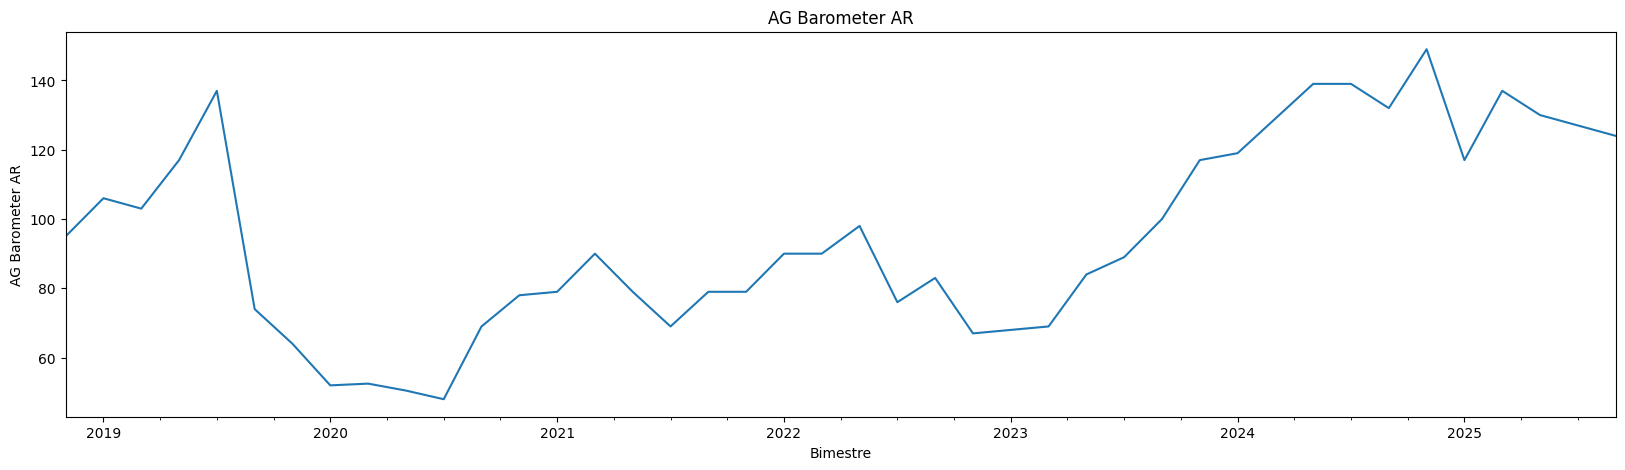

In [12]:
data1.plot(figsize=(20,5), title = "AG Barometer AR", ylabel = "AG Barometer AR", xlabel = "Bimestre")
plt.show()

In [13]:
#ageconomy

df_ageconomy = pd.read_csv('../data/clean_data/AgEconomyBarometer_cleaned.csv')
print(df_ageconomy.head())

      Month  Year  Purdue/CME Ag Economy Barometer  \
0   October  2015                              116   
1  November  2015                               97   
2  December  2015                              107   
3   January  2016                               98   
4  February  2016                               96   

   Index of Current Conditions  Index of Future Expectations  \
0                          118                           116   
1                           98                            97   
2                          125                            98   
3                           99                            98   
4                           82                           102   

   Farm Capital Investment Index  
0                             67  
1                             51  
2                             75  
3                             52  
4                             56  


In [14]:
df_ageconomy['Date'] = df_ageconomy['Year'].astype(str) + '-' + df_ageconomy['Month'].astype(str).str.zfill(2) + '-01'
df_ageconomy['Date'] = pd.to_datetime(df_ageconomy['Date'])

In [15]:
df_ageconomy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 7 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Month                            121 non-null    object        
 1   Year                             121 non-null    int64         
 2   Purdue/CME Ag Economy Barometer  121 non-null    int64         
 3   Index of Current Conditions      121 non-null    int64         
 4   Index of Future Expectations     121 non-null    int64         
 5   Farm Capital Investment Index    121 non-null    int64         
 6   Date                             121 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 6.7+ KB


In [16]:
df_ageconomy.set_index('Date', inplace=True)
df_ageconomy.head()

,Month,Year,Purdue/CME Ag Economy Barometer,Index of Current Conditions,Index of Future Expectations,Farm Capital Investment Index
Date,,,,,,
2015-10-01,October,2015,116,118,116,67
2015-11-01,November,2015,97,98,97,51
2015-12-01,December,2015,107,125,98,75
2016-01-01,January,2016,98,99,98,52
2016-02-01,February,2016,96,82,102,56


In [17]:
data2 = df_ageconomy['Purdue/CME Ag Economy Barometer']

In [18]:
# Asignamos frecuencia mensual
data2 = data2.asfreq('MS')

# Corroboramos que la frecuencia sea mensual
print(data2.index)

DatetimeIndex(['2015-10-01', '2015-11-01', '2015-12-01', '2016-01-01',
               '2016-02-01', '2016-03-01', '2016-04-01', '2016-05-01',
               '2016-06-01', '2016-07-01',
               ...
               '2025-01-01', '2025-02-01', '2025-03-01', '2025-04-01',
               '2025-05-01', '2025-06-01', '2025-07-01', '2025-08-01',
               '2025-09-01', '2025-10-01'],
              dtype='datetime64[ns]', name='Date', length=121, freq='MS')


In [19]:
# Dividimos en train y test
# Seleccionamos el primer 80% para train
train2 = data2.iloc[:round(len(data2)*.8)]
# Seleccionamos el 20% restante para test
test2 = data2.iloc[round(len(data2)*.8):]
# Corroboramos que los limites se hayan establecido segun lo planificado
print(train2, test2)

Date
2015-10-01    116
2015-11-01     97
2015-12-01    107
2016-01-01     98
2016-02-01     96
             ... 
2023-06-01    121
2023-07-01    123
2023-08-01    115
2023-09-01    106
2023-10-01    110
Freq: MS, Name: Purdue/CME Ag Economy Barometer, Length: 97, dtype: int64 Date
2023-11-01    115
2023-12-01    114
2024-01-01    106
2024-02-01    111
2024-03-01    114
2024-04-01     99
2024-05-01    108
2024-06-01    105
2024-07-01    113
2024-08-01    100
2024-09-01     88
2024-10-01    115
2024-11-01    145
2024-12-01    136
2025-01-01    141
2025-02-01    152
2025-03-01    140
2025-04-01    148
2025-05-01    158
2025-06-01    146
2025-07-01    135
2025-08-01    125
2025-09-01    126
2025-10-01    129
Freq: MS, Name: Purdue/CME Ag Economy Barometer, dtype: int64


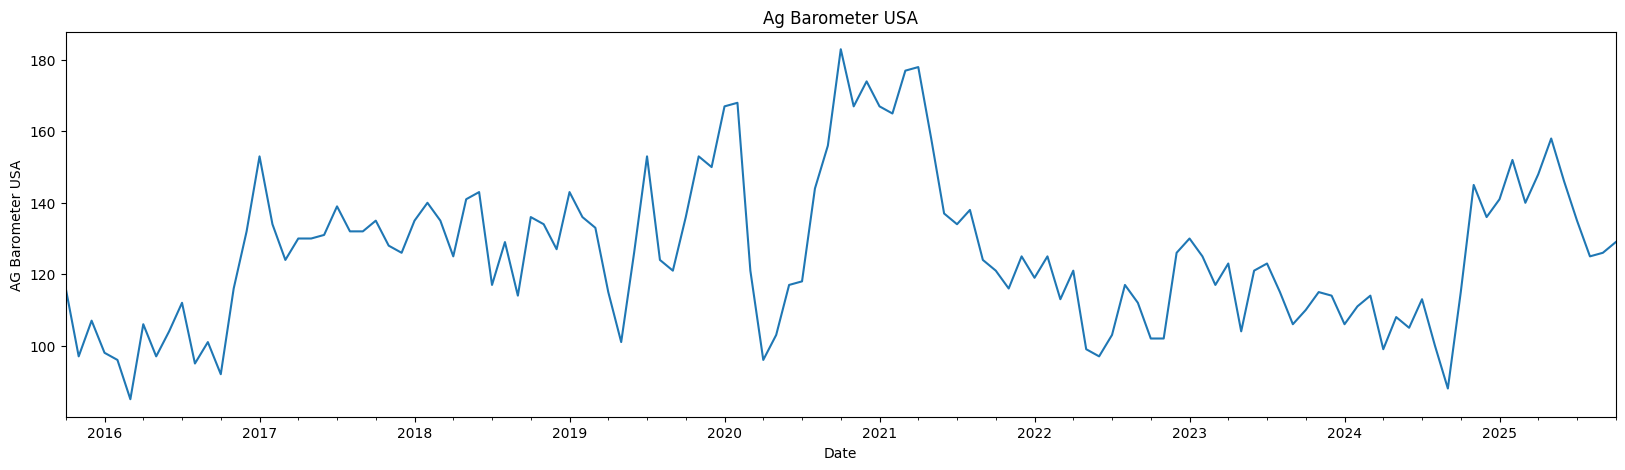

In [20]:
data2.plot(figsize=(20,5), title = "Ag Barometer USA", ylabel = "AG Barometer USA", xlabel = "Date")
plt.show()

In [21]:
#ICG UTDT

df_ICG = pd.read_csv('../data/clean_data/ICG_cleaned.csv')
print(df_ICG.head())

  indicator        date  value
0       ICG  2001-11-01  1.036
1       ICG  2001-12-01  0.757
2       ICG  2002-01-01  1.357
3       ICG  2002-02-01  0.983
4       ICG  2002-03-01  0.862


In [22]:
df_ICG.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 288 entries, 0 to 287
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   indicator  288 non-null    object 
 1   date       288 non-null    object 
 2   value      288 non-null    float64
dtypes: float64(1), object(2)
memory usage: 6.9+ KB


In [23]:
df_ICG['date'] = pd.to_datetime(df_ICG['date'], format='%Y-%m-%d')
df_ICG.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 288 entries, 0 to 287
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   indicator  288 non-null    object        
 1   date       288 non-null    datetime64[ns]
 2   value      288 non-null    float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 6.9+ KB


In [24]:
df_ICG.set_index('date', inplace=True)
print(df_ICG.head())

           indicator  value
date                       
2001-11-01       ICG  1.036
2001-12-01       ICG  0.757
2002-01-01       ICG  1.357
2002-02-01       ICG  0.983
2002-03-01       ICG  0.862


In [25]:
data3 = df_ICG['value']

In [26]:
# Asignamos frecuencia mensual
data3 = data3.asfreq('MS')

# Corroboramos que la frecuencia sea mensual
print(data3.index)

DatetimeIndex(['2001-11-01', '2001-12-01', '2002-01-01', '2002-02-01',
               '2002-03-01', '2002-04-01', '2002-05-01', '2002-06-01',
               '2002-07-01', '2002-08-01',
               ...
               '2025-01-01', '2025-02-01', '2025-03-01', '2025-04-01',
               '2025-05-01', '2025-06-01', '2025-07-01', '2025-08-01',
               '2025-09-01', '2025-10-01'],
              dtype='datetime64[ns]', name='date', length=288, freq='MS')


In [27]:
# Dividimos en train y test
# Seleccionamos el primer 80% para train
train3 = data3.iloc[:round(len(data3)*.8)]
# Seleccionamos el 20% restante para test
test3 = data3.iloc[round(len(data3)*.8):]
# Corroboramos que los limites se hayan establecido segun lo planificado
print(train3, test3)

date
2001-11-01    1.036000
2001-12-01    0.757000
2002-01-01    1.357000
2002-02-01    0.983000
2002-03-01    0.862000
                ...   
2020-08-01    2.377858
2020-09-01    2.265969
2020-10-01    1.992344
2020-11-01    2.019343
2020-12-01    1.853868
Freq: MS, Name: value, Length: 230, dtype: float64 date
2021-01-01    1.875130
2021-02-01    1.816565
2021-03-01    1.783856
2021-04-01    1.732998
2021-05-01    1.932057
2021-06-01    1.703405
2021-07-01    1.698242
2021-08-01    1.852228
2021-09-01    1.579328
2021-10-01    1.524077
2021-11-01    1.453584
2021-12-01    1.422823
2022-01-01    1.543808
2022-02-01    1.494021
2022-03-01    1.507731
2022-04-01    1.436073
2022-05-01    1.303236
2022-06-01    1.401616
2022-07-01    1.116667
2022-08-01    1.182577
2022-09-01    1.230554
2022-10-01    1.281745
2022-11-01    1.189553
2022-12-01    1.251266
2023-01-01    1.274121
2023-02-01    1.171330
2023-03-01    1.177622
2023-04-01    1.070521
2023-05-01    1.132271
2023-06-01    1.119

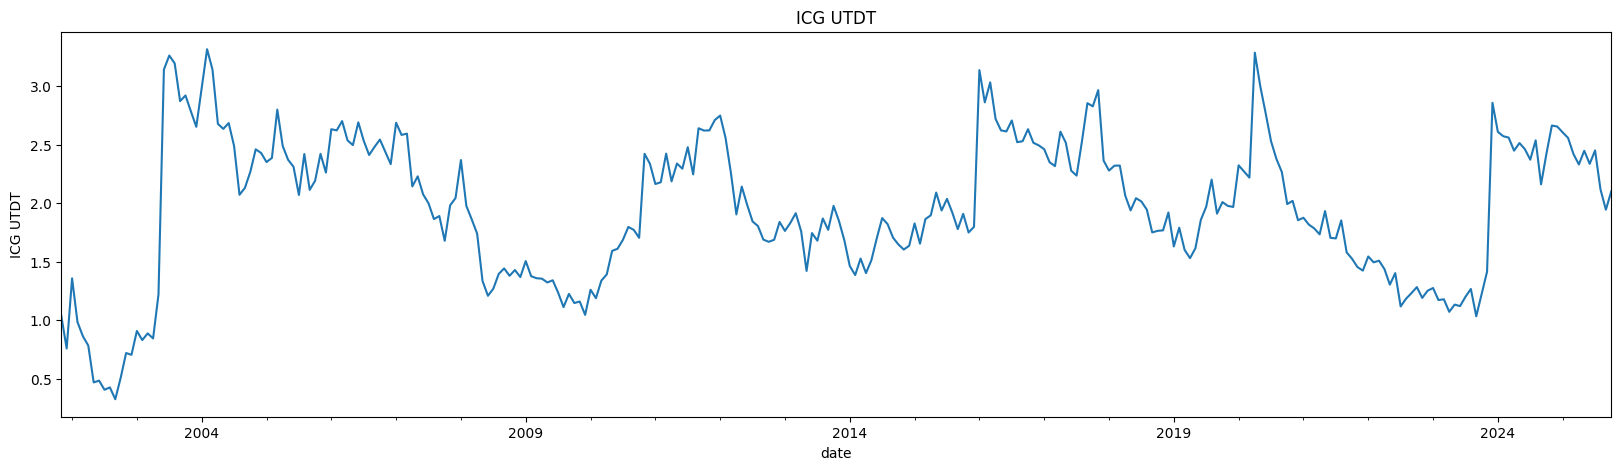

In [28]:
data3.plot(figsize=(20,5), title = "ICG UTDT", ylabel = "ICG UTDT", xlabel = "date")
plt.show()

En este apartado se presentan las siguientes series, en orden:

- Ag Barometer AR
- Ag Barometer USA
- ICG

La primera parece tener una componente de tendencia, aparentemente lineal, lo que implicaría que la serie no es estacionaria. Pero al tener esta leve tendencia y, visualmente, no notarse ciclos, con una diferenciación tal vez pueda ser necesario para hacer a la misma estacionaria.

Para Ag Baromemter USA, la seria aparenta ser estacionaria. Tal vez puede existir una leve componente de tendencia o alguna variación en variabilidad pero, a priori, se asemeja mucho a una estacionaria. Para ese caso no necesitariamos diferenciación.

Por otro lado, tenemos el ICG, que a simple vista no parece ser estacionaria. Si bien podriamos pensar en cierta oscilación sobre una valor medio, parece tener ciclos de picos y valles, con saltos absolutos marcados sobre años de elecciones presidenciales. En este caso, una prueba a hacer sería diferenciar entre los valores del ciclo, para reducir dicha estacionalidad.

In [29]:
# Serie a data frame
df_ciclos = data3.to_frame(name='ICG')

# Filtrado
fecha_inicio_ciclos = pd.to_datetime('2003-12-01')
df_ciclos = df_ciclos.loc[df_ciclos.index >= fecha_inicio_ciclos].copy()

# Construcción de los gobiernos
diff_meses = (
    (df_ciclos.index.year - fecha_inicio_ciclos.year) * 12 +
    (df_ciclos.index.month - fecha_inicio_ciclos.month)
)

periodo_ciclo = 48 # 4 años * 12 meses

df_ciclos['Ciclo'] = (diff_meses // periodo_ciclo) + 1

condiciones = [
    (df_ciclos['Ciclo'] == 1),
    (df_ciclos['Ciclo'] == 2),
    (df_ciclos['Ciclo'] == 3),
    (df_ciclos['Ciclo'] == 4),
    (df_ciclos['Ciclo'] == 5),
    (df_ciclos['Ciclo'] == 6)        
                 
]

valores_salida = ['NK', 'CFK 1', 'CFK 2', 'Macri', 'Alberto', 'Milei']

df_ciclos['Ciclo'] = np.select(
    condiciones, 
    valores_salida,
    default = 'NA'
)

df_ciclos['Mes_en_Ciclo'] = (diff_meses % periodo_ciclo) + 1


# Chequeo
print("--- DataFrame con Ciclos de 4 Años (Meses 1, 47, 48) ---")
print(df_ciclos[['ICG', 'Ciclo', 'Mes_en_Ciclo']].head(50)) 
print("\n--- Final del Último Ciclo ---")
print(df_ciclos[['ICG', 'Ciclo', 'Mes_en_Ciclo']].tail(5))

--- DataFrame con Ciclos de 4 Años (Meses 1, 47, 48) ---
                 ICG  Ciclo  Mes_en_Ciclo
date                                     
2003-12-01  2.652758     NK             1
2004-01-01  2.985494     NK             2
2004-02-01  3.316432     NK             3
2004-03-01  3.141597     NK             4
2004-04-01  2.678145     NK             5
2004-05-01  2.635284     NK             6
2004-06-01  2.684965     NK             7
2004-07-01  2.488041     NK             8
2004-08-01  2.071303     NK             9
2004-09-01  2.130540     NK            10
2004-10-01  2.267291     NK            11
2004-11-01  2.460088     NK            12
2004-12-01  2.429269     NK            13
2005-01-01  2.351252     NK            14
2005-02-01  2.386628     NK            15
2005-03-01  2.799647     NK            16
2005-04-01  2.489071     NK            17
2005-05-01  2.370627     NK            18
2005-06-01  2.311147     NK            19
2005-07-01  2.069969     NK            20
2005-08-01  2.42008

C:\Users\FBorbiconi\AppData\Local\Temp\ipykernel_24436\1738518073.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = cm.get_cmap('Spectral', num_ciclos)


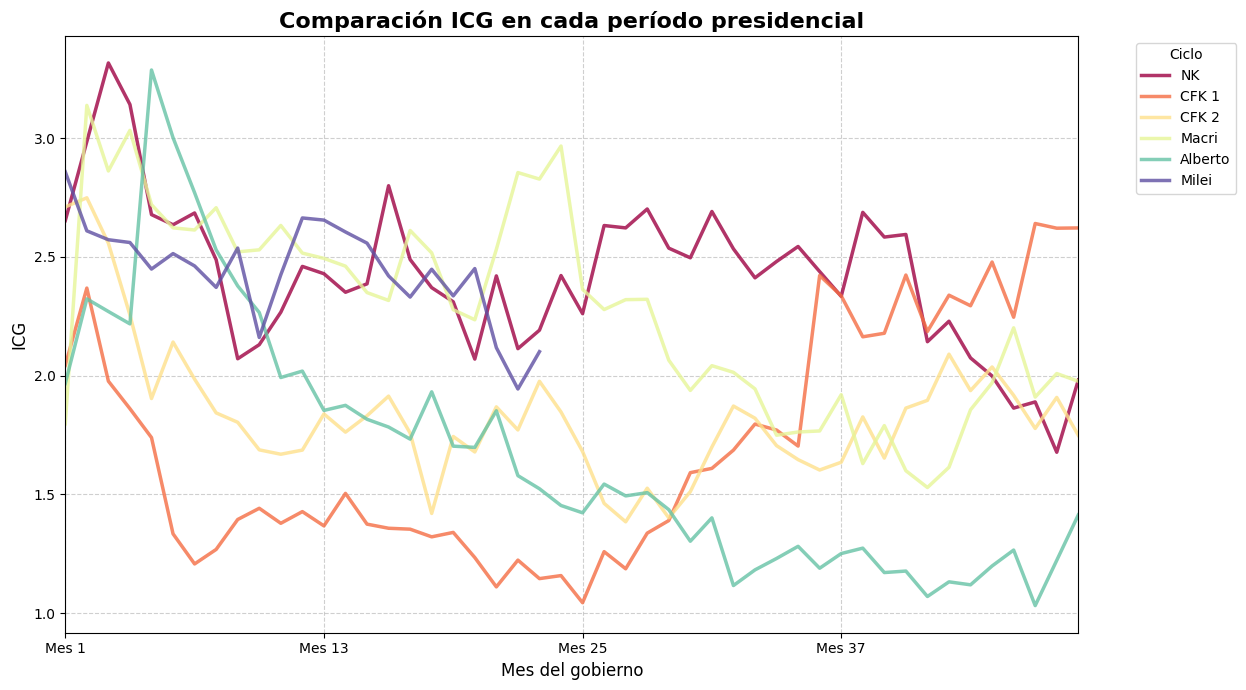

In [30]:


# Obtener los ciclos únicos para iterar y asignar colores
ciclos_unicos = df_ciclos['Ciclo'].unique()
num_ciclos = len(ciclos_unicos)

# Usar un mapa de colores (colormap) de Matplotlib (e.g., 'viridis', 'tab10', 'Spectral')
colors = cm.get_cmap('Spectral', num_ciclos) 

# Construcción del gráfico
plt.figure(figsize=(14, 7))
ax = plt.gca() # Obtener el objeto axes actual

# Iterar y Graficar cada Ciclo
for i, ciclo in enumerate(ciclos_unicos):

    data_ciclo = df_ciclos[df_ciclos['Ciclo'] == ciclo]
    
    ax.plot(
        data_ciclo['Mes_en_Ciclo'], 
        data_ciclo['ICG'],       
        label=f'{ciclo}',    
        color=colors(i),            
        linewidth=2.5,
        alpha=0.8
    )

# Configuración del Gráfico
plt.title('Comparación ICG en cada período presidencial', fontsize=16, fontweight='bold')
plt.xlabel('Mes del gobierno', fontsize=12)
plt.ylabel('ICG', fontsize=12)


meses_anuales = [1, 13, 25, 37]
plt.xticks(meses_anuales, [f'Mes {m}' for m in meses_anuales])
plt.xlim(1, 48)


plt.legend(title='Ciclo', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout(rect=[0, 0, 0.9, 1])
plt.show()

# 3 Graficar la FAS, FAC y FACP de las mismas en un solo gráfico y analizarlas. ¿Qué puede inferir de los gráficos?. Justificar con teoría. 

In [31]:
# Grafica de ACF, PACF y autocovarianza
def graficar_acf_pacf_autocovarianza(data, lags=10):
    Y = data.values

    fig, ax = plt.subplots(1, 3, figsize=(18, 6))


    sm.graphics.tsa.plot_acf(Y, lags=lags, ax=ax[0])
    ax[0].set_title('Funcion de autocorrelación (ACF)')

    sm.graphics.tsa.plot_pacf(Y, lags=lags, ax=ax[1])
    ax[1].set_title('Funcion de autocorrelación Parcial (grafico introductorio) (PACF)')

    def autocovariance(series, lag):
        series_mean = np.mean(series)
        n = len(series)
        return np.sum((series[:n-lag] - series_mean) * (series[lag:] - series_mean)) / n

    lags = np.arange(lags)
    autocov = [autocovariance(Y, lag) for lag in lags]

    ax[2].stem(lags, autocov)
    ax[2].set_title('Autocovarianza')
    ax[2].set_xlabel('Lag')
    ax[2].set_ylabel('Autocovarianza')

    plt.tight_layout();
    plt.show();

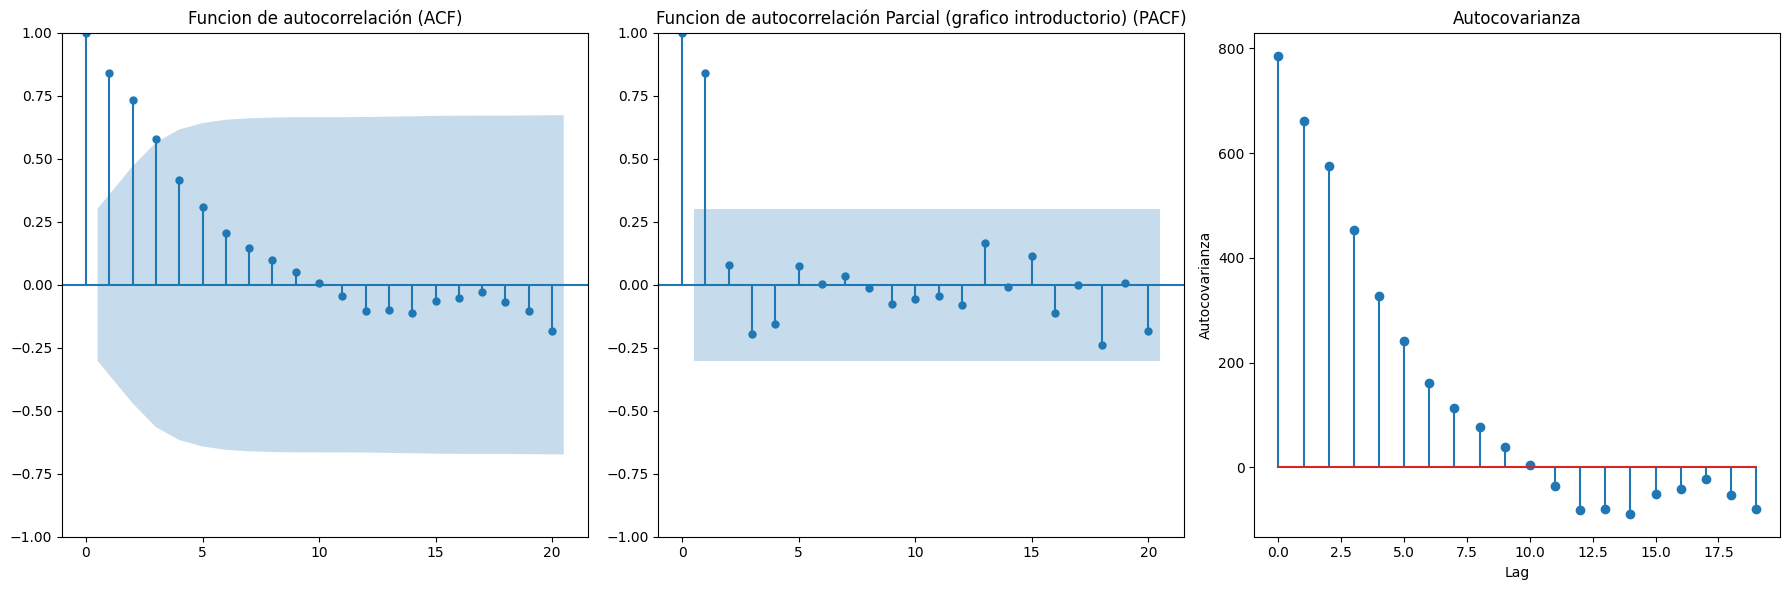

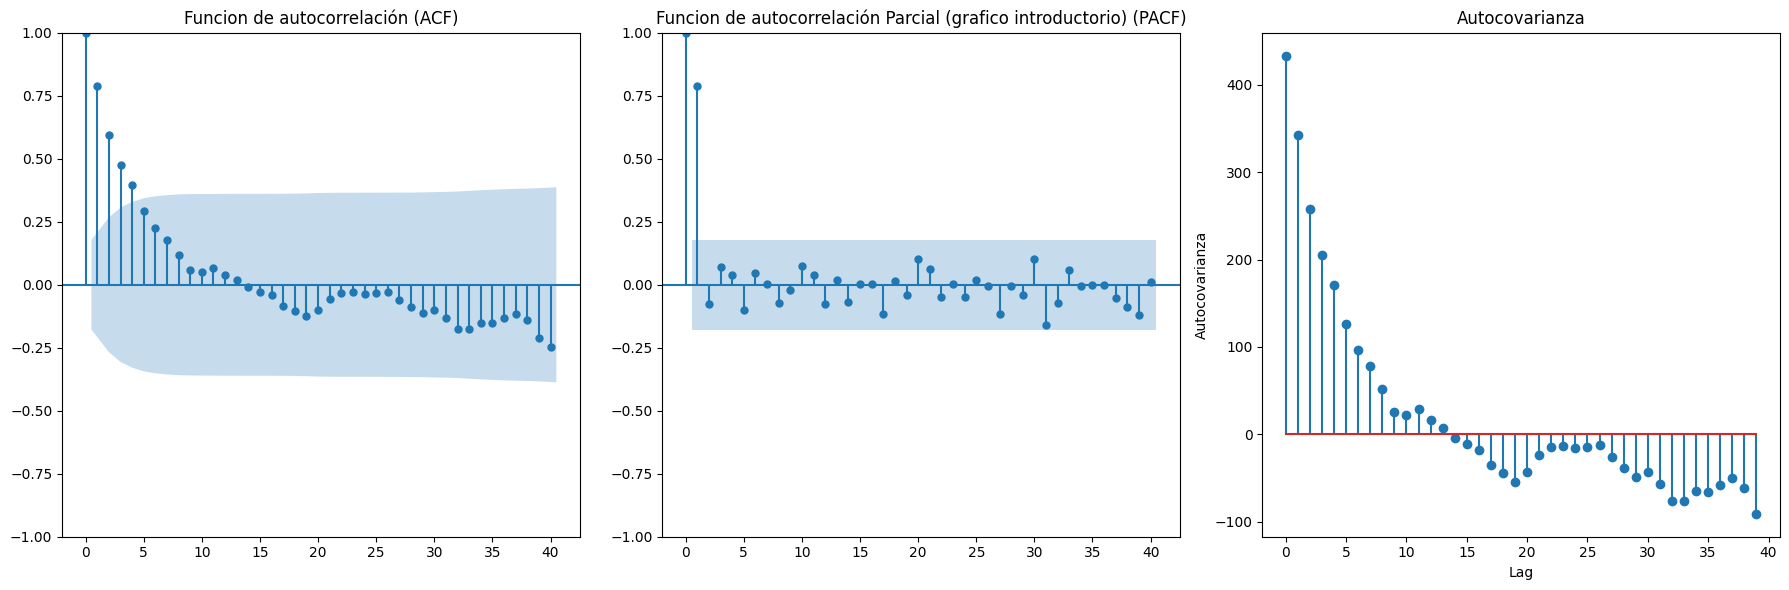

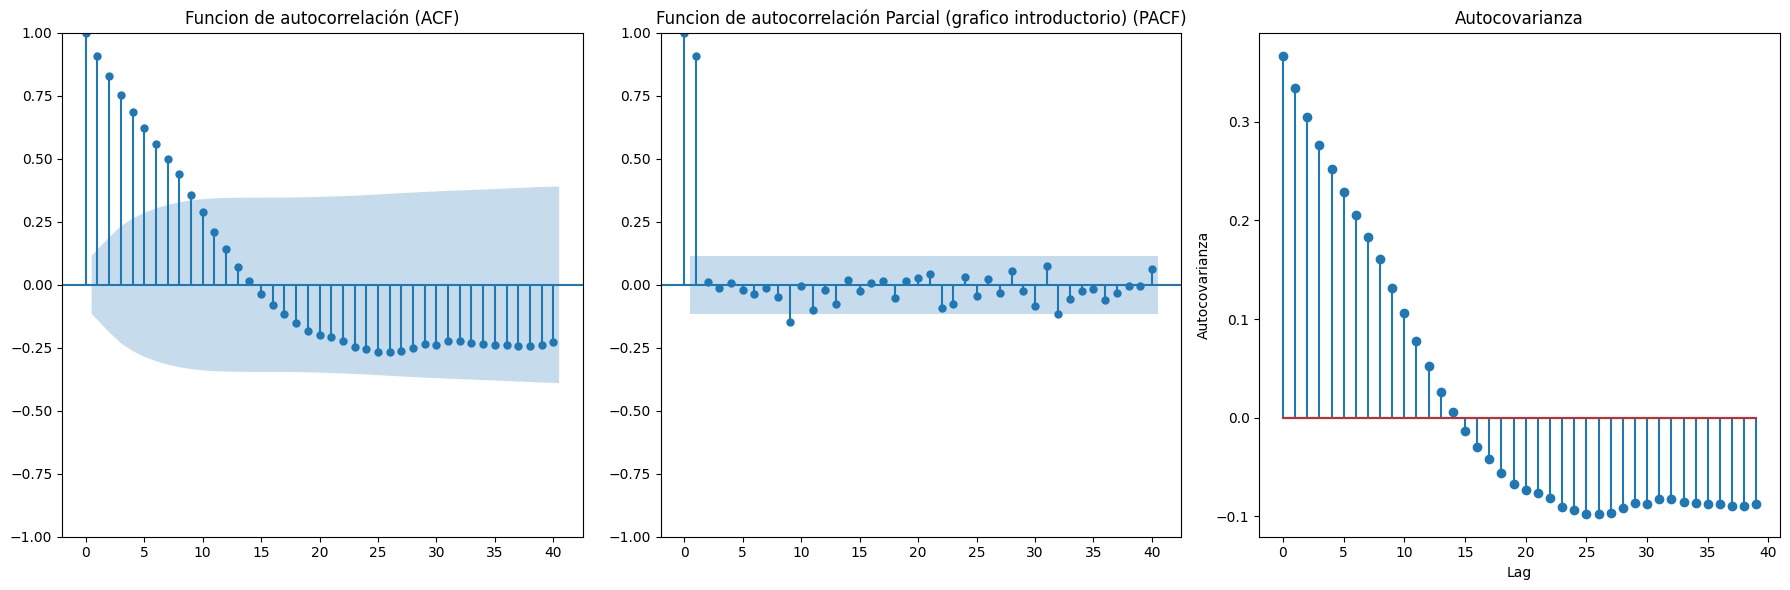

In [32]:
graficar_acf_pacf_autocovarianza(data1, lags=20)
graficar_acf_pacf_autocovarianza(data2, lags=40)
graficar_acf_pacf_autocovarianza(data3, lags=40)

En el caso del Ag Barometer AR podemos ver un decaimiento que aparenta ser lineal, lo que ya nos puede hacer pensar en que no tenemos estacionariedad. A su vez, vemos una fuerte autocorrelación parcial con el primer rezago, haciendonos pensar en una componente autorregresiva de orden 1.

El caso del Ag Barometer USA podría indicarnos una serie estacionaria, donde se nota un decaimiento exponencial en el correlograma, con memoria relativamente corta. A su vez, otra vez visualizando la autocorrelación parcial, podemos pensar en una autocorrelación de orden 1. Con todo esto, pensamos que un primer modelo de aproximación podría ser un AR(1)

Para el caso del ICG, vemos más una caida lineal de la autocorrelación y algunos rezagos estadísticamente significativos en la autocorrelación parcial. Este es el caso más dificil de interpretar, ya que la supuesta estacionalidad marcada tampoco se ve muy notoriamente en estos gráficos

In [33]:
def print_test_afd(y):
  resultado = tsa.adfuller(y)
  print('Estadistico ADF: %f' % resultado[0])
  print('p-valor: %f' % resultado[1])
  print('Valores criticos:')
  for key, valor in resultado[4].items():
    print('\t%s: %.3f' % (key, valor))

In [34]:
print_test_afd(data1)
print_test_afd(data2)
print_test_afd(data3)

Estadistico ADF: -0.959246
p-valor: 0.767837
Valores criticos:
	1%: -3.627
	5%: -2.946
	10%: -2.612
Estadistico ADF: -3.727040
p-valor: 0.003748
Valores criticos:
	1%: -3.486
	5%: -2.886
	10%: -2.580
Estadistico ADF: -3.752162
p-valor: 0.003436
Valores criticos:
	1%: -3.453
	5%: -2.872
	10%: -2.572


Recordando que el test de Dickey-Fuller involucra:

- H0: existencia de raiz unitaria
- Ha: no existencia de raiz unitaria

Dados los p valores de los test a las 3 series, podemos decir que:

- Para AG Barometer AR, no podemos rechazar la H0, o sea, la no estacionariedad
- Para AG Barometer USA e ICG, se presenta evidencia estadística para rechazar H0 y afirmar que presentan estacionariedad

# 4 Planteo de modelos

In [35]:
# Funciones
def graficar_pred(serie_test, serie_pred, conf_int, ylabel, titulo="Valores Originales vs Predicciones", xlabel="Mes"):
    fig_x = plt.figure(figsize=(12,3), dpi=100)
    axes_x = fig_x.add_axes([0.0, 0.0, 1, 1])

    # Graficamos los datos tests y las predicciones
    serie_test.plot(label="Serie Original de Test")
    serie_pred.plot(label="Predicciones")

    # Pasamos dataframe con los intervalos de confianza a series de Pandas y graficamos
    conf_int.iloc[:,1].plot(label="Intervalo de Confianza Superior", color = "black")
    conf_int.iloc[:,0].plot(label="Intervalo de Confianza Inferior", color = "black")

    axes_x.set_xlabel(xlabel)
    axes_x.set_ylabel(ylabel)
    axes_x.set_title(titulo)
    axes_x.legend(loc=0)
    axes_x.grid(True, color='0.6', dashes=(5,2,1,2))

def evaluar_metricas(serie_test, serie_pred):
    print(f'MSE: {mean_squared_error(serie_test, serie_pred)}')
    print(f'MAE: {mean_absolute_error(serie_test, serie_pred)}')
    print(f'RMSE: {np.sqrt(mean_squared_error(serie_test, serie_pred))}')
    print(f'MAPE: {round(np.mean(abs((serie_test-serie_pred)/serie_test)),4)}')


## 4.1 Ag Barometer AR

In [36]:
stepwise_fit = auto_arima(train1, trace=True,suppress_warnings=True, d = 1, stepwise = False)

 ARIMA(0,1,0)(0,0,0)[1] intercept   : AIC=312.704, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[1] intercept   : AIC=314.352, Time=0.13 sec
 ARIMA(0,1,2)(0,0,0)[1] intercept   : AIC=315.768, Time=0.18 sec
 ARIMA(0,1,3)(0,0,0)[1] intercept   : AIC=317.723, Time=0.23 sec
 ARIMA(0,1,4)(0,0,0)[1] intercept   : AIC=318.816, Time=0.27 sec
 ARIMA(0,1,5)(0,0,0)[1] intercept   : AIC=inf, Time=0.77 sec
 ARIMA(1,1,0)(0,0,0)[1] intercept   : AIC=314.280, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[1] intercept   : AIC=316.142, Time=0.15 sec
 ARIMA(1,1,2)(0,0,0)[1] intercept   : AIC=inf, Time=0.50 sec
 ARIMA(1,1,3)(0,0,0)[1] intercept   : AIC=inf, Time=0.60 sec
 ARIMA(1,1,4)(0,0,0)[1] intercept   : AIC=inf, Time=0.74 sec
 ARIMA(2,1,0)(0,0,0)[1] intercept   : AIC=315.969, Time=0.13 sec
 ARIMA(2,1,1)(0,0,0)[1] intercept   : AIC=317.961, Time=0.20 sec
 ARIMA(2,1,2)(0,0,0)[1] intercept   : AIC=inf, Time=0.58 sec
 ARIMA(2,1,3)(0,0,0)[1] intercept   : AIC=inf, Time=0.72 sec
 ARIMA(3,1,0)(0,0,0)[1] intercept   : AIC=317.936

### Modelos con predictoras

In [37]:
df_dolar = pd.read_csv('../data/clean_data/dolar_full_cleaned.csv') 

df_dolar['Brecha %'] = df_dolar['brecha']/df_dolar['oficial']

df_dolar['fecha'] = pd.to_datetime(df_dolar['fecha'], format='%Y-%m-%d')

df_dolar = df_dolar[
    (df_dolar['fecha'] >= '2018-11-01') &
    (df_dolar['fecha'] <= '2025-09-01')
].copy()

df_dolar.set_index('fecha', inplace=True)

dolar = df_dolar['Brecha %']

# Asignamos frecuencia bimestral
dolar = dolar.asfreq('2MS')

In [38]:
df_soja = pd.read_csv('../data/clean_data/precio_soja_chicago_cleaned.csv') 

df_soja['date'] = pd.to_datetime(df_soja['date'], format='%Y-%m-%d')

df_soja.set_index('date', inplace=True)

soja = df_soja['Close']

# Asignamos frecuencia diaria
soja = soja.asfreq('D')

# Completamos los datos
soja = soja.ffill()

# Nos quedamos con los datos del inicio de cada bimestre
soja = soja[soja.index.isin(dolar.index)]

# Asignamos frecuencia bimestral
soja = soja.asfreq('2MS')

In [39]:
df_rem = pd.read_csv('../data/clean_data/rem_cleaned.csv') 

df_rem['Fecha'] = pd.to_datetime(df_rem['Fecha'], format='%Y-%m-%d')

df_rem['Fecha'] = df_rem['Fecha'] + pd.Timedelta(days=1)

df_rem.set_index('Fecha', inplace=True)

rem = df_rem['Valor']

# Nos quedamos con los datos del inicio de cada bimestre
rem = rem[rem.index.isin(dolar.index)]

# Asignamos frecuencia bimestral
rem = rem.asfreq('2MS')

In [40]:
agbarometerUSA = data2[data2.index.isin(dolar.index)]

# Asignamos frecuencia bimestral
agbarometerUSA = agbarometerUSA.asfreq('2MS')

ICG = data3[data3.index.isin(dolar.index)]

# Asignamos frecuencia bimestral
ICG = ICG.asfreq('2MS')

In [41]:
data_completa = pd.concat([data1, agbarometerUSA, dolar, rem, soja, ICG], axis=1)

data_completa.rename(columns={'Ag Barometer': 'Ag Barometer AR', 'Purdue/CME Ag Economy Barometer': 'Ag Barometer USA', 'Brecha %': 'Brecha', 'Valor': 'REM', 'Close': 'Soja', 'value': 'ICG'},
                     inplace = True)

In [42]:
# Dividimos en train y test
# Seleccionamos el primer 90% para train
full_train = data_completa.iloc[:round(len(data_completa)*.9)]
# Seleccionamos el 10% restante para test
full_test = data_completa.iloc[round(len(data_completa)*.9):]
# Corroboramos que los limites se hayan establecido segun lo planificado
print(full_train, full_test)

            Ag Barometer AR  Ag Barometer USA    Brecha    REM     Soja  \
2018-11-01             95.0               134  0.001467   30.6   869.00   
2019-01-01            106.0               143  0.002881   28.7   882.50   
2019-03-01            103.0               133  0.003480   29.0   899.25   
2019-05-01            117.0               101 -0.001728   31.4   839.50   
2019-07-01            137.0               153 -0.001109   30.0   885.50   
2019-09-01             74.0               121  0.118759   48.3   857.00   
2019-11-01             64.0               153  0.215209   48.2   924.25   
2020-01-01             52.0               167  0.316240   42.2   943.00   
2020-03-01             52.5               121  0.360243   39.9   883.50   
2020-05-01             50.5               103  0.670553   49.0   847.25   
2020-07-01             48.0               118  0.568141   52.5   893.75   
2020-09-01             69.0               156  0.679726   51.2   955.00   
2020-11-01             78

In [54]:
modelo_ARIMAX = sm.tsa.ARIMA(full_train['Ag Barometer AR'], order=(0,1,0), exog=full_train[['Ag Barometer USA', 'Brecha', 'REM', 'Soja', 'ICG']])

modelo_ARIMAX = modelo_ARIMAX.fit()

modelo_ARIMAX.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:        Ag Barometer AR   No. Observations:                   38
Model:                 ARIMA(0, 1, 0)   Log Likelihood                -151.017
Date:                Tue, 09 Dec 2025   AIC                            314.034
Time:                        20:52:55   BIC                            323.700
Sample:                    11-01-2018   HQIC                           317.442
                         - 01-01-2025                                         
Covariance Type:                  opg                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Ag Barometer USA     0.2822      0.170      1.660      0.097      -0.051       0.615
Brecha              -7.0255     17.268     -0.407      0.684     -40.871      26.820
REM                 -0.0430      0.173     -0.248      0.804      -0.383       0.297
Soja                -0.0164      0.052     -0.313      0.754      -0.119       0.086
ICG                  0.2437     16.847      0.014      0.988     -32.776      33.264
sigma2             205.4513     50.715      4.051      0.000     106.051     304.852
===================================================================================
Ljung-Box (L1) (Q):                   1.06   Jarque-Bera (JB):                34.31
Prob(Q):                              0.30   Prob(JB):                         0.00
Heteroskedasticity (H):               0.46   Skew:                            -1.58
Prob(H) (two-sided):                  0.20   Kurtosis:                         6.50
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## 4.2 Ag Barometer USA

In [55]:
stepwise_fit = auto_arima(train2, trace=True,suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=786.937, Time=0.25 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=872.420, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=781.329, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=817.103, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1219.117, Time=0.01 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=782.960, Time=0.09 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=782.938, Time=0.12 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=784.969, Time=0.14 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.02 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 0.760 seconds


Dada la salida del auto_arima, se entrenarán 3 modelos candidatos para compararlos AR(1), AR(2) y ARMA(1,1)


In [56]:
modelo1 = sm.tsa.arima.ARIMA(train2, order=(1,0,0))

resultado1 = modelo1.fit()

resultado1.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:     Purdue/CME Ag Economy Barometer   No. Observations:                   97
Model:                              ARIMA(1, 0, 0)   Log Likelihood                -387.662
Date:                             Tue, 09 Dec 2025   AIC                            781.324
Time:                                     20:56:08   BIC                            789.048
Sample:                                 10-01-2015   HQIC                           784.447
                                      - 10-01-2023                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        125.6416      6.344     19.804      0.000     113.207     138.076
ar.L1          0.7835      0.059     13.228      0.000       0.667       0.900
sigma2       171.6338     25.404      6.756      0.000     121.844     221.424
===================================================================================
Ljung-Box (L1) (Q):                   0.32   Jarque-Bera (JB):                 0.05
Prob(Q):                              0.57   Prob(JB):                         0.97
Heteroskedasticity (H):               0.90   Skew:                            -0.04
Prob(H) (two-sided):                  0.78   Kurtosis:                         2.91
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [57]:
modelo2 = sm.tsa.arima.ARIMA(train2, order=(2,0,0))

resultado2 = modelo2.fit()

resultado2.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:     Purdue/CME Ag Economy Barometer   No. Observations:                   97
Model:                              ARIMA(2, 0, 0)   Log Likelihood                -387.479
Date:                             Tue, 09 Dec 2025   AIC                            782.959
Time:                                     20:56:19   BIC                            793.257
Sample:                                 10-01-2015   HQIC                           787.123
                                      - 10-01-2023                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        125.8358      5.962     21.107      0.000     114.151     137.521
ar.L1          0.8320      0.096      8.625      0.000       0.643       1.021
ar.L2         -0.0619      0.092     -0.673      0.501      -0.242       0.118
sigma2       170.9741     26.019      6.571      0.000     119.978     221.970
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 0.13
Prob(Q):                              0.92   Prob(JB):                         0.94
Heteroskedasticity (H):               0.89   Skew:                            -0.05
Prob(H) (two-sided):                  0.75   Kurtosis:                         2.85
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [47]:

modelo3 = sm.tsa.arima.ARIMA(train2, order=(1,0,1))

resultado3 = modelo3.fit()

resultado3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:     Purdue/CME Ag Economy Barometer   No. Observations:                   97
Model:                              ARIMA(1, 0, 1)   Log Likelihood                -387.469
Date:                             Tue, 09 Dec 2025   AIC                            782.938
Time:                                     20:50:38   BIC                            793.237
Sample:                                 10-01-2015   HQIC                           787.102
                                      - 10-01-2023                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        125.8265      5.976     21.055      0.000     114.114     137.539
ar.L1          0.7520      0.075     10.050      0.000       0.605       0.899
ma.L1          0.0821      0.119      0.692      0.489      -0.150       0.315
sigma2       170.9599     25.901      6.600      0.000     120.194     221.725
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 0.12
Prob(Q):                              0.93   Prob(JB):                         0.94
Heteroskedasticity (H):               0.89   Skew:                            -0.04
Prob(H) (two-sided):                  0.74   Kurtosis:                         2.85
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Al trabajar con los modelos más complejos se ve que los coeficientes que se agregan no son significativos, por lo que se continuará trabajando con el AR(1) al cual se le hará un análisis mas detallado de los residuos

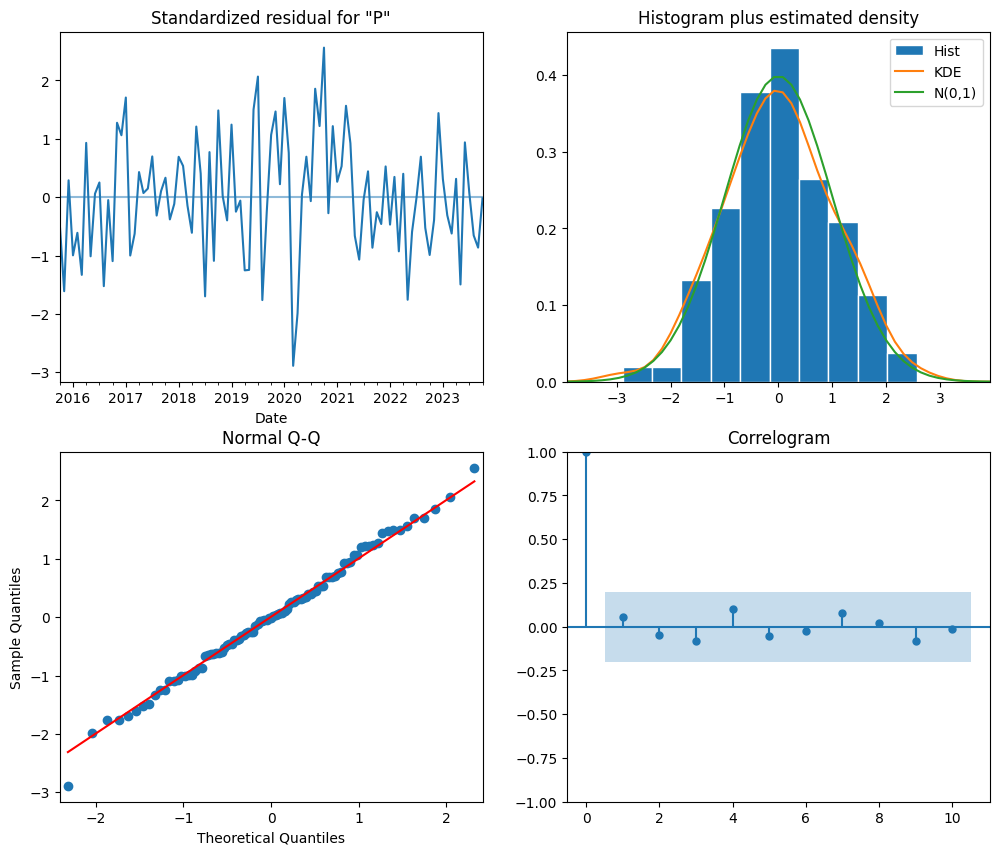

In [ ]:
# Agregar análisis punto pandemia
fig_res_AR1 = resultado1.plot_diagnostics(figsize=(12,10))

Al analizar el comportamiento de los residuos con mayor detalle, se observa que los mismos están incorrelacionados (p-value Ljung-Box = 0.57) y al analizar tanto el test de Jarque Bera como el histograma y el gráfico QQ Normal se ve que el supuesto de normalidad se cumple



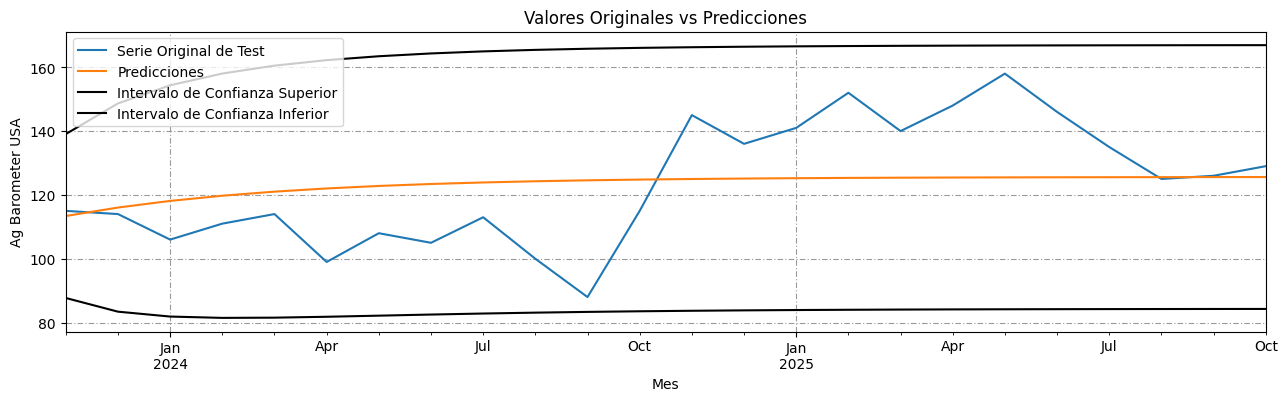

In [49]:

# Utilizando el modelo realizamos la prediccion correspondiente al periodo de test
predicciones = resultado1.get_forecast(len(test2))

# Graficamos la porcion de test de la serie original junto con las predicciones y los intervalos de confianza
graficar_pred(test2, predicciones.predicted_mean, predicciones.conf_int(), ylabel="Ag Barometer USA")


In [50]:
evaluar_metricas(test2, predicciones.predicted_mean)


MSE: 303.686392147698
MAE: 14.444208028143905
RMSE: 17.426600131629176
MAPE: 0.1202



El gráfico de las predicciones  del modelo muestra un comportamiento totalmente esperado en base al modelo ajustado. Como se trabajó con un AR(1) se hace una predicción del promedio pero no se logran captar los movimientos que el índice presenta mes a mes 

## 4.3 ICG UTDT

In [51]:
stepwise_fit = auto_arima(train3, trace = True, suppress_warnings = True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=27.593, Time=0.92 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=431.316, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=22.899, Time=0.10 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=243.756, Time=0.13 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=993.101, Time=0.19 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=24.837, Time=0.19 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=24.840, Time=0.22 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=25.646, Time=0.52 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.07 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 2.390 seconds
